<a href="https://colab.research.google.com/github/krzysztof-kar/ML2025/blob/main/Lab04_penalized-regression_prdom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Analyzing and Plotting Bias in Penalized Regression**

-------------------------------

In this assignment, you will explore how **Ridge** and **Lasso** regression introduce **bias** into a model to reduce **variance**, and how the choice of the regularization parameter $\lambda$ affects this trade-off. The goal is to visualize and analyze the **bias-variance trade-off** and understand the conditions under which penalization helps or hinders model performance.

## **The Question**

**How does varying the regularization parameter $\lambda$ in Ridge and Lasso regression impact the trade-off between bias and variance?**

- Generate a synthetic dataset based on a **known** linear relationship:
  
  $$
  y = \beta_0 + \beta_1 x + \ldots + \epsilon
  $$

  where $$\epsilon \sim \mathcal{N}(0, \sigma^2),$$

  use a **high-dimensional** setting (e.g., 50 predictors) with only a few non-zero true coefficients to emphasize the effects of regularization. I stress, the $\beta_i$ coefficients should be known for this experiment and they should be mostly 0, with only a few non-zero parameters.

- Investigate how increasing $\lambda$ influences the model’s **bias**, **variance**, and **Mean Squared Error (MSE)**.
- Plot **Bias²**, **Variance**, and **MSE** on a single graph for both Ridge and Lasso models.
- Explain MSE decomposition into bias and variance. Read more on the MSE decomposition if you need to.

**Does the regularization lead to an optimal trade-off point where MSE is minimized? Explain why this point exists.**




**Expected Outcome:**
 - As $\lambda$ increases:
   - **Bias** increases (the model becomes too simple).
   - **Variance** decreases (the model becomes more stable).
   - **MSE** forms a **U-shape**, revealing the optimal trade-off.

- Analyze how **Ridge** and **Lasso** differ in terms of their bias-variance trade-offs.
- Discuss situations where one method may outperform the other, considering factors like **feature sparsity** and **multicollinearity**.


## **Colab Notebook Requirements**
- Your **Colab notebook** should:
  - Simulate the synthetic dataset and apply Ridge and Lasso regression.
  - Plot **Bias²**, **Variance**, and **MSE** against $\lambda$ for both models.
  - Include a section answering the questions.
  - Be well-documented with comments and explanations for each step.


## **Publish on GitHub**
- Upload your Colab notebook to your **GitHub repository** for this course.
- In your repository’s **README**, include a **link** to the notebook.
- In the notebook include **“Open in Colab”** badge so the notebook can be launched directly from GitHub.


# ROZWIĄZANIE
Ridge nie działa

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


n = 50
m = 20

X = np.zeros(shape=(n,m))
np.random.seed(42)
for i in range(n):
  X[i] = np.random.uniform(-1, 1, m)

beta = np.zeros(n)
ind = [2,5,23,33,41,49]
for i in ind:
  beta[i] = np.random.rand()

y = X.T.dot(beta) + np.random.normal(scale=1.0, size=m)
print(beta)

X = X.T
scaler = StandardScaler()
X = scaler.fit_transform(X)
n_folds = 10
lasso = LassoCV(cv=n_folds, random_state=42).fit(X, y)



from sklearn.linear_model import RidgeCV, Ridge

ridge = RidgeCV(alphas=np.logspace(0, 10, 1000), cv=n_folds).fit(X,y)

print("Lasso optimal alpha:", lasso.alpha_)
print("Ridge optimal alpha:", ridge.alpha_)

#now we apply lasso and ridge regression with optimal alphas to the dataset
lasso_reg = Lasso(alpha = lasso.alpha_).fit(X,y)
ridge_reg = Ridge(alpha = ridge.alpha_).fit(X,y)

print("Lasso coefficients:\n", lasso_reg.coef_)
print("Ridge coefficients:\n", ridge_reg.coef_)


[0.         0.         0.18513293 0.         0.         0.54190095
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.87294584
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.73222489 0.         0.
 0.         0.         0.         0.         0.         0.80656115
 0.         0.         0.         0.         0.         0.
 0.         0.65878337]
Lasso optimal alpha: 0.14504996505700798
Ridge optimal alpha: 7.959777002314984
Lasso coefficients:
 [-0.          0.         -0.          0.          0.          0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.         -0.          0.
  0.         -0.         -0.         -0.         -0.          0.451204
  0.         -0.12410519  0.          0.01474464  0.          0.23851505
  0.17381081 -0.         -0.          0.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.572e-03, tolerance: 3.663e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.300e-03, tolerance: 3.663e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.918e-03, tolerance: 3.663e

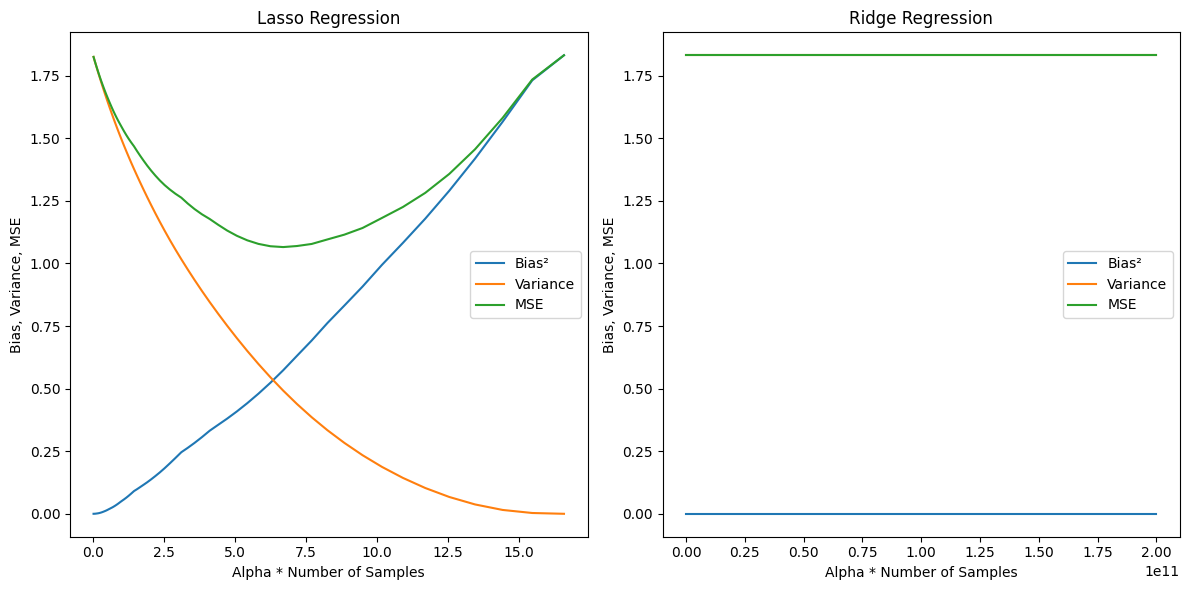

In [18]:
l_alphas = lasso.alphas_
r_alphas = np.logspace(0, 10, 1000)
n_samples = X.shape[0]

# Initialize lists to store results
lasso_bias_squared = []
lasso_variance = []
lasso_mse = []

ridge_bias_squared = []
ridge_variance = []
ridge_mse = []

# Iterate through the alpha values and compute bias, variance, and MSE for each model
for alpha in l_alphas:
    lasso_model = Lasso(alpha=alpha).fit(X,y)
    lasso_pred = lasso_model.predict(X)
    lasso_bias_squared.append(np.mean((lasso_pred - y)**2))
    lasso_variance.append(np.var(lasso_pred))
    lasso_mse.append(np.mean((lasso_pred - y)**2) + np.var(lasso_pred))


for aplha in r_alphas:
  ridge_model = Ridge(alpha=alpha).fit(X,y)
  ridge_pred = ridge_model.predict(X)
  ridge_bias_squared.append(np.mean((ridge_pred - y)**2))
  ridge_variance.append(np.var(ridge_pred))
  ridge_mse.append(np.mean((ridge_pred - y)**2) + np.var(ridge_pred))


plt.figure(figsize=(12, 6))

# Lasso Plot
plt.subplot(1, 2, 1)
plt.plot(l_alphas * n_samples, lasso_bias_squared, label="Bias²")
plt.plot(l_alphas * n_samples, lasso_variance, label="Variance")
plt.plot(l_alphas * n_samples, lasso_mse, label="MSE")
plt.xlabel("Alpha * Number of Samples")
plt.ylabel("Bias, Variance, MSE")
plt.title("Lasso Regression")
plt.legend()


# Ridge Plot
plt.subplot(1, 2, 2)
plt.plot(r_alphas * n_samples, ridge_bias_squared, label="Bias²")
plt.plot(r_alphas * n_samples, ridge_variance, label="Variance")
plt.plot(r_alphas * n_samples, ridge_mse, label="MSE")
plt.xlabel("Alpha * Number of Samples")
plt.ylabel("Bias, Variance, MSE")
plt.title("Ridge Regression")
plt.legend()

plt.tight_layout()
plt.show()
